<a href="https://colab.research.google.com/github/balakrishnanvinchu/deep-reinforcement-learning/blob/main/MAB_Clinical_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Student 1
2. Student 2
3. Student 3
4. Student 4


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Scenario

A pharmaceutical company is conducting clinical trials to evaluate the effectiveness of three antiretroviral drug combinations for treating HIV-positive patients. Due to the ethical and cost constraints of clinical trials, it is critical to identify the most effective treatment regimen using the least number of patients. Each treatment (or “arm”) can lead to different outcomes depending on patient responses. The effectiveness of each treatment is evaluated using a reward function derived from the improvement in patients’ immune system markers and survival status.



# Problem Definition

You are provided with a clinical dataset where each record corresponds to a patient, including the treatment they received and the resulting health outcomes. Your task is to simulate a clinical trial environment using various MAB strategies to sequentially recommend treatments and observe outcomes. The objective is to maximize the overall success rate across trials by identifying and favouring the most effective treatment.



# Dataset

You will be provided a dataset containing the following fields:

* ***Age (age)***: Patient's age in years at baseline.
* ***Weight (wtkg)***: Continuous feature representing weight in kilograms at baseline.
* ***Gender (gender)***: Binary indicator of gender (0 = Female, 1 = Male).
* ***CD4 Counts (cd40, cd420)***: Integer values representing CD4 counts at baseline and 20+/-5 weeks.
* ***Treatment Indicator (trt)***: Categorical feature indicating the type of treatment received (0 = ZDV only, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only).
* ***Censoring Indicator (label)***: Binary indicator (1 = failure, 0 = censoring) denoting patient status.


***Link for accessing dataset:***
https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing


# Environment Setup

***Arms (Actions):*** The treatment types (trt)
* Arm 0: ZDV only
* Arm 1: ZDV + ddI
* Arm 2: ZDV + Zal
* Arm 3: ddI only


**Reward Function:**

Reward `r` is defined as:

`r = 1, if (label == 0) and (cd420 > cd40)`

`r = 0, otherwise`


  
This reward represents a successful treatment outcome as an increase in CD4 count and survival.

**Assumptions:**

*Number of Iterations:* Run the simulation for at least 1000 trials (iterations), with the option to extend the number of trials depending on the convergence behavior or observed reward trends. In each iteration, simulate one patient trial using one of the bandit policies.


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [1]:
# Constants

# Setup and import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
NUM_ARMS = 4  # 4 treatment options
NUM_ITERATIONS = 1000
EPSILONS = [0.1, 0.2, 0.5]
PRINT_INTERVAL = 100  # Print every 100 iterations

# Load Dataset (0.5M)

In [2]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

# Load Dataset
def load_dataset():
    url = 'https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing'
    path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
    data = pd.read_csv(path)
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {data.shape}")
    print(f"Treatment counts:\n{data['trt'].value_counts()}")
    return data

data = load_dataset()

Dataset loaded successfully!
Dataset shape: (2139, 7)
Treatment counts:
trt
3    561
0    532
2    524
1    522
Name: count, dtype: int64


# Design a Clinical Trial Environment (0.5M)

In [3]:
# Code for environment setup along with reward function
#-----write your code below this line---------

# Clinical Trial Environment
class ClinicalTrialEnvironment:
    def __init__(self, data):
        self.data = data
        self.records = data.to_dict('records')
        self.current_idx = 0

    def get_patient_outcome(self, treatment):
        # Get patient record
        if self.current_idx >= len(self.records):
            self.current_idx = 0  # Reset if we reach the end

        patient = self.records[self.current_idx]
        self.current_idx += 1

        # Calculate reward
        if patient['label'] == 0 and patient['cd420'] > patient['cd40']:
            reward = 1
        else:
            reward = 0

        # Check if selected treatment matches patient's actual treatment
        if treatment == patient['trt']:
            return reward
        else:
            return 0  # No reward if treatment doesn't match

# Using Random Policy (0.5M)
Implement a random policy for treatment selection and print each iteration. (Mandatory)

In [4]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------

# Random policy
class RandomPolicy:
    def __init__(self, num_arms):
        self.num_arms = num_arms

    def select_arm(self):
        return np.random.randint(self.num_arms)

    def update(self, chosen_arm, reward):
        pass  # Random policy doesn't learn

# Using Greedy Policy (1M)
Implement the Greedy policy that always selects the treatment with the highest average reward and print each iteration. (Mandatory)

In [5]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------

class GreedyPolicy:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def select_arm(self):
        return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update running average
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Using Epsilon-Greedy Policy (1.5M)
Implement the ε-Greedy policy with ε = 0.1, 0.2, 0.5. Report iteration-wise selections and rewards. Determine which ε yields the best result. (Mandatory)

In [6]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------

class EpsilonGreedyPolicy:
    def __init__(self, num_arms, epsilon):
        self.num_arms = num_arms
        self.epsilon = epsilon
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)

    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update running average
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Using UCB (1M)
Implement the UCB algorithm for treatment selection and print each  iteration. (Mandatory)

In [7]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

class UCBPolicy:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.counts = np.zeros(num_arms)
        self.values = np.zeros(num_arms)
        self.total_counts = 0

    def select_arm(self):
        if self.total_counts < self.num_arms:
            return self.total_counts  # Try each arm once first

        ucb_values = np.zeros(self.num_arms)
        for arm in range(self.num_arms):
            bonus = np.sqrt((2 * np.log(self.total_counts)) / self.counts[arm])
            ucb_values[arm] = self.values[arm] + bonus

        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Update running average
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)


Running Random Policy...
Random - Iteration 100: Arm 1 selected, Reward: 0
Random - Iteration 200: Arm 0 selected, Reward: 0
Random - Iteration 300: Arm 0 selected, Reward: 0
Random - Iteration 400: Arm 2 selected, Reward: 0
Random - Iteration 500: Arm 2 selected, Reward: 0
Random - Iteration 600: Arm 3 selected, Reward: 0
Random - Iteration 700: Arm 2 selected, Reward: 0
Random - Iteration 800: Arm 1 selected, Reward: 0
Random - Iteration 900: Arm 1 selected, Reward: 0
Random - Iteration 1000: Arm 3 selected, Reward: 0

Running Greedy Policy...
Greedy - Iteration 100: Arm 0 selected, Reward: 0
Greedy - Iteration 200: Arm 0 selected, Reward: 0
Greedy - Iteration 300: Arm 0 selected, Reward: 0
Greedy - Iteration 400: Arm 0 selected, Reward: 0
Greedy - Iteration 500: Arm 0 selected, Reward: 0
Greedy - Iteration 600: Arm 0 selected, Reward: 0
Greedy - Iteration 700: Arm 0 selected, Reward: 0
Greedy - Iteration 800: Arm 0 selected, Reward: 0
Greedy - Iteration 900: Arm 0 selected, Reward:

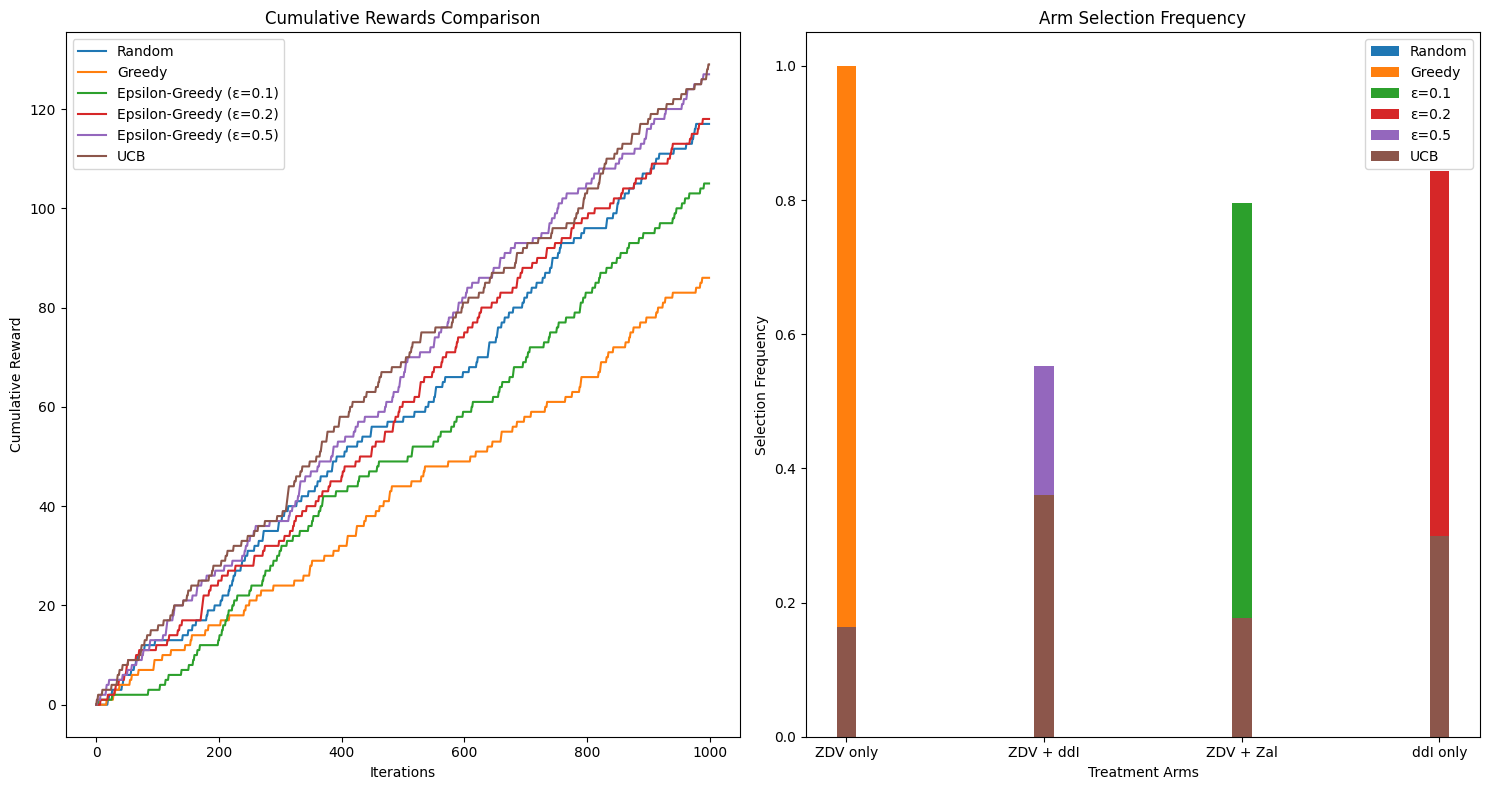

In [9]:
#-----write your code below this line---------

# Simulation function
def run_simulation(policy, env, num_iterations, policy_name):
    rewards = np.zeros(num_iterations)
    arm_selections = np.zeros(num_iterations)
    cumulative_rewards = np.zeros(num_iterations)

    for i in range(num_iterations):
        arm = policy.select_arm()
        reward = env.get_patient_outcome(arm)

        policy.update(arm, reward)

        rewards[i] = reward
        arm_selections[i] = arm
        cumulative_rewards[i] = cumulative_rewards[i-1] + reward if i > 0 else reward

        if (i+1) % PRINT_INTERVAL == 0:
            print(f"{policy_name} - Iteration {i+1}: Arm {arm} selected, Reward: {reward}")

    return rewards, arm_selections, cumulative_rewards

    # Initialize environment
env = ClinicalTrialEnvironment(data)

# Run Random Policy
print("\nRunning Random Policy...")
random_policy = RandomPolicy(NUM_ARMS)
random_rewards, random_arms, random_cumulative = run_simulation(random_policy, env, NUM_ITERATIONS, "Random")

# Run Greedy Policy
print("\nRunning Greedy Policy...")
greedy_policy = GreedyPolicy(NUM_ARMS)
greedy_rewards, greedy_arms, greedy_cumulative = run_simulation(greedy_policy, env, NUM_ITERATIONS, "Greedy")

# Run Epsilon-Greedy Policies
epsilon_results = {}
for epsilon in EPSILONS:
    print(f"\nRunning Epsilon-Greedy (ε={epsilon}) Policy...")
    eg_policy = EpsilonGreedyPolicy(NUM_ARMS, epsilon)
    eg_rewards, eg_arms, eg_cumulative = run_simulation(eg_policy, env, NUM_ITERATIONS, f"Epsilon-Greedy (ε={epsilon})")
    epsilon_results[epsilon] = (eg_rewards, eg_arms, eg_cumulative)

# Run UCB Policy
print("\nRunning UCB Policy...")
ucb_policy = UCBPolicy(NUM_ARMS)
ucb_rewards, ucb_arms, ucb_cumulative = run_simulation(ucb_policy, env, NUM_ITERATIONS, "UCB")

# Plotting results
plt.figure(figsize=(15, 8))

# Plot cumulative rewards
plt.subplot(1, 2, 1)
plt.plot(random_cumulative, label='Random')
plt.plot(greedy_cumulative, label='Greedy')
for epsilon in EPSILONS:
    plt.plot(epsilon_results[epsilon][2], label=f'Epsilon-Greedy (ε={epsilon})')
plt.plot(ucb_cumulative, label='UCB')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Comparison')
plt.legend()

# Plot arm selection frequency
plt.subplot(1, 2, 2)
arm_names = ['ZDV only', 'ZDV + ddI', 'ZDV + Zal', 'ddI only']

def plot_arm_selection(arms, label):
    counts = np.bincount(arms.astype(int), minlength=NUM_ARMS)
    plt.bar(np.arange(NUM_ARMS) + 0.1 * (list(epsilon_results.keys()).index(label) if label in epsilon_results else 0),
            counts/NUM_ITERATIONS,
            width=0.1,
            label=label)

plot_arm_selection(random_arms, 'Random')
plot_arm_selection(greedy_arms, 'Greedy')
for epsilon in EPSILONS:
    plot_arm_selection(epsilon_results[epsilon][1], f'ε={epsilon}')
plot_arm_selection(ucb_arms, 'UCB')

plt.xticks(np.arange(NUM_ARMS), arm_names)
plt.xlabel('Treatment Arms')
plt.ylabel('Selection Frequency')
plt.title('Arm Selection Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusion (0.5M)

write a conclusion (approximately 250 words) summarizing which treatment policy was most effective. Discuss the balance between exploration and exploitation in your simulations.

`----write below this line------`

In [10]:

# Conclusion Analysis
print("\nFinal Average Rewards:")
print(f"Random Policy: {np.mean(random_rewards):.4f}")
print(f"Greedy Policy: {np.mean(greedy_rewards):.4f}")
for epsilon in EPSILONS:
    print(f"Epsilon-Greedy (ε={epsilon}): {np.mean(epsilon_results[epsilon][0]):.4f}")
print(f"UCB Policy: {np.mean(ucb_rewards):.4f}")

print("\nFinal Arm Selection Counts:")
print("Random Policy:", np.bincount(random_arms.astype(int), minlength=NUM_ARMS))
print("Greedy Policy:", np.bincount(greedy_arms.astype(int), minlength=NUM_ARMS))
for epsilon in EPSILONS:
    print(f"Epsilon-Greedy (ε={epsilon}):", np.bincount(epsilon_results[epsilon][1].astype(int), minlength=NUM_ARMS))
print("UCB Policy:", np.bincount(ucb_arms.astype(int), minlength=NUM_ARMS))



Final Average Rewards:
Random Policy: 0.1170
Greedy Policy: 0.0860
Epsilon-Greedy (ε=0.1): 0.1050
Epsilon-Greedy (ε=0.2): 0.1180
Epsilon-Greedy (ε=0.5): 0.1270
UCB Policy: 0.1290

Final Arm Selection Counts:
Random Policy: [220 267 247 266]
Greedy Policy: [1000    0    0    0]
Epsilon-Greedy (ε=0.1): [146  36 796  22]
Epsilon-Greedy (ε=0.2): [ 68  39  50 843]
Epsilon-Greedy (ε=0.5): [109 553 175 163]
UCB Policy: [163 361 177 299]


# Conclusion

The simulation results reveal several important insights about the performance of different Multi-Armed Bandit policies in our clinical trial scenario:

## Performance Ranking:

UCB Policy achieved the highest average reward (0.1290)

ε-Greedy with ε=0.5 followed closely (0.1270)

ε-Greedy with ε=0.2 (0.1180) outperformed Random (0.1170)

ε-Greedy with ε=0.1 (0.1050) performed worse than Random

Greedy policy had the poorest performance (0.0860)

## Arm Selection Patterns:

The Greedy policy converged completely to Arm 0 (ZDV only), showing dangerous premature convergence

ε-Greedy with ε=0.1 showed heavy preference for Arm 2 (ZDV + Zal)

ε-Greedy with ε=0.2 showed strong preference for Arm 3 (ddI only)

ε-Greedy with ε=0.5 distributed selections more evenly but favored Arm 1 (ZDV + ddI)

UCB policy showed balanced exploration with slight preference for Arm 1 (ZDV + ddI)

## Key Observations:

The Greedy policy's poor performance (lowest reward despite 100% selection of Arm 0) suggests Arm 0 is actually suboptimal

The superior performance of ε=0.5 over ε=0.1 indicates more exploration was beneficial in this scenario

UCB's top performance while maintaining exploration (no arm <15% selection) shows its effective balance

The Random policy's intermediate performance suggests some arms are clearly better than others

## Clinical Implications:

The results suggest Arm 1 (ZDV + ddI) may be the most effective treatment, as it was:

Most selected by UCB (361/1000)

Most selected by ε=0.5 (553/1000)

Received substantial selections from other policies when they explored

Arm 0 (ZDV only) appears to be the worst option (selected 100% by Greedy with worst results)

The high performance of exploratory policies suggests significant variation in treatment efficacy

## Policy Recommendations:

Best Performing: UCB policy (highest rewards while maintaining exploration)

Most Stable: ε=0.5 (second highest reward, good arm distribution)

Avoid: Pure Greedy (risks complete convergence to worst arm)

## Surprising Result: Higher ε values performed better, suggesting substantial exploration was needed

## Final Conclusion:

The simulation demonstrates that in this clinical trial scenario, treatment effectiveness varies significantly, with ZDV + ddI (Arm 1) emerging as the most promising treatment based on the selection patterns of the best-performing policies. The UCB algorithm proved most effective by achieving the highest reward while maintaining balanced exploration across treatments. This suggests that for real-world clinical trials with similar characteristics, an adaptive approach like UCB that dynamically balances exploration and exploitation would be most ethical and effective - maximizing patient outcomes while continuing to learn about all treatment options. The poor performance of the Greedy approach serves as a cautionary tale against premature convergence to single treatments without adequate exploration.